In [1]:
from textwrap import indent

from IPython.display import Javascript

from liblet import ANTLR, AnnotatedTreeWalker, Tree, pyast2tree, side_by_side

from operator import add, mul, truediv, sub

from operator import itemgetter

from IPython.display import Latex

from fractions import Fraction

import importlib

import core.arithmetic_manager

from core.util import *

In [2]:
importlib.reload(core.util)
importlib.reload(core.arithmetic_manager)
ArithManager = core.arithmetic_manager.ArithManager

In [8]:
ex1 = '1 + {2 x [(3 + 4 : 2) + 5] x 6} - [ 7 + (1 + 8) : 3 ] x [ 9 : (2 + 1) + 2 ]'
ex2 = '<2+3>/4/<5+6>/7'
ex3 = '2^<3+4^5:2^7>'
ex4 = '3 + 13 x -<1 + 3>/<2^<1+4> - 6>'
ex5a = '3 / < 4 + 2 > + 2 x { 3 : ( 4 + 5 ) + 2 ^ < 6 x 1/2 > } - < 2 x [ 5 x ( 3 + 4 ) + 5 ] - 1 > / 6'
ex5b = '3 / < 4 + 2 > + 2 x ( 3 : ( 4 + 5 ) + 2 ^ < 6 x 1/2 > ) - < 2 x ( 5 x ( 3 + 4 ) + 5 ) - 1 > / 6'

src = '<1+2+3-4x4-5-6>^<4+5+6-{4+5+6--[3+4+5^-2]}>'

arithExpr = ArithManager.arith_expr('antlrGrammar.g')
ast = ArithManager.ptree2ast(ArithManager.ptree(arithExpr, src))
blocks = ArithManager.generate_blocks(ast)
MEMORY = dict(blocks)

main_block = blocks[-1][1]
child_to_calc = None

while blocks:
    block_id, current_block = blocks[0]
    parent_to_calc = ArithManager.annotate_with_priority(current_block)

    tex, _ = ArithManager.latex_format(main_block, MEMORY)
    display_latex(tex)
    if child_to_calc and '_calc' in child_to_calc.root:
        del child_to_calc.root['_calc']

    children = []
    for child in parent_to_calc.children:
        if is_next_to_calc(child):
            child = child_to_calc = Tree({'type': 'atomExpr', 'value': ArithManager.eval(child, MEMORY), 'priority': 0, '_calc': 'last'}, [])
        children.append(child) 
    parent_to_calc.children = children

    if is_calculable(current_block):
        current_block = current_block.children[0]
        blocks = blocks[1:]
    
    MEMORY[block_id] = current_block

    
tex, _ = ArithManager.latex_format(main_block, {})
display_latex(tex)

ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

TypeError: both arguments should be Rational instances

ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2
ANTLR runtime and generated code versions disagree: 4.9.1!=4.7.2


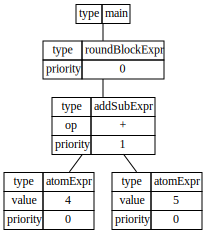

In [4]:
src = '(4 + 5)'


arithExpr = ArithManager.arith_expr('antlrGrammar.g')
ast = ArithManager.ptree2ast(ArithManager.ptree(arithExpr, src))
ast